In [47]:
import pandas as pd
import seaborn as sns

user_data = pd.read_csv("https://stepik.org/media/attachments/lesson/360348/user_data.csv")
logs = pd.read_csv("https://stepik.org/media/attachments/lesson/360348/logs.csv")

In [195]:
data = logs.groupby("client", as_index=False).aggregate({"success": "sum"}).rename(
    columns={"success": "success_count"}).sort_values(by="success_count", ascending=False)
data.query("success_count == @data.success_count.max()").sort_values(by="client", ascending=True).client.to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [135]:
logs.groupby("platform").aggregate({"success": "sum"}).rename(columns={"success": "success_count"}).sort_values(
    by="success_count", ascending=False)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [50]:
logs.merge(user_data, how="left", on="client").query("premium == True").groupby("platform").agg(
    {"success": "count"}).rename(columns={"success": "success_count"}).sort_values("success_count", ascending=False)

,success_count
platform,
phone,246
computer,150
tablet,24


<Axes: ylabel='count'>

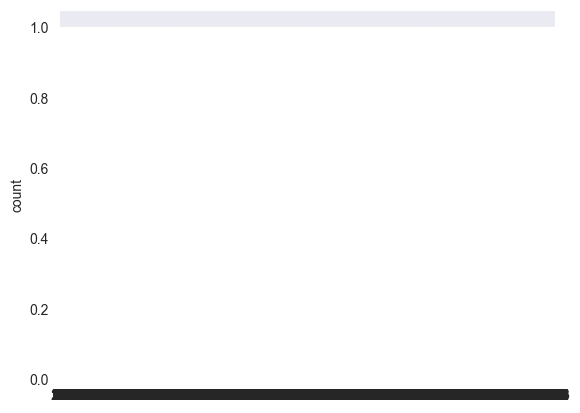

In [151]:
sns.histplot(data=user_data.query("premium == True").age, kde=True, stat="density")
sns.histplot(data=user_data.query("premium == False").age, kde=True, stat="density")

<Axes: xlabel='success_count', ylabel='count'>

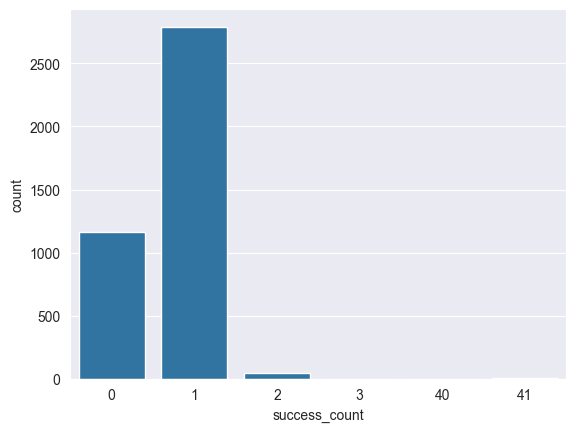

In [132]:
sns.countplot(x="success_count", data=data, stat="count")

<Axes: xlabel='success', ylabel='count'>

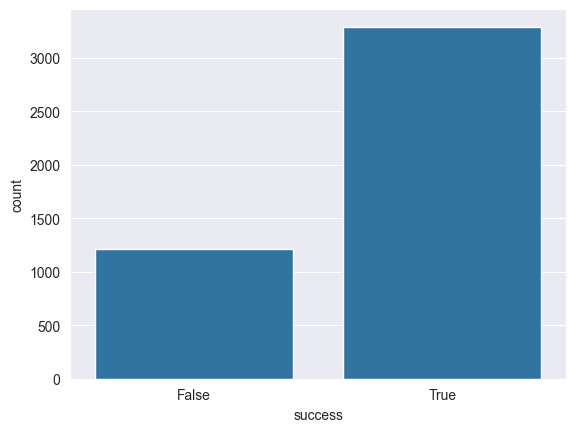

In [134]:
sns.countplot(x="success", data=logs, stat="count")

<Axes: xlabel='age', ylabel='count'>

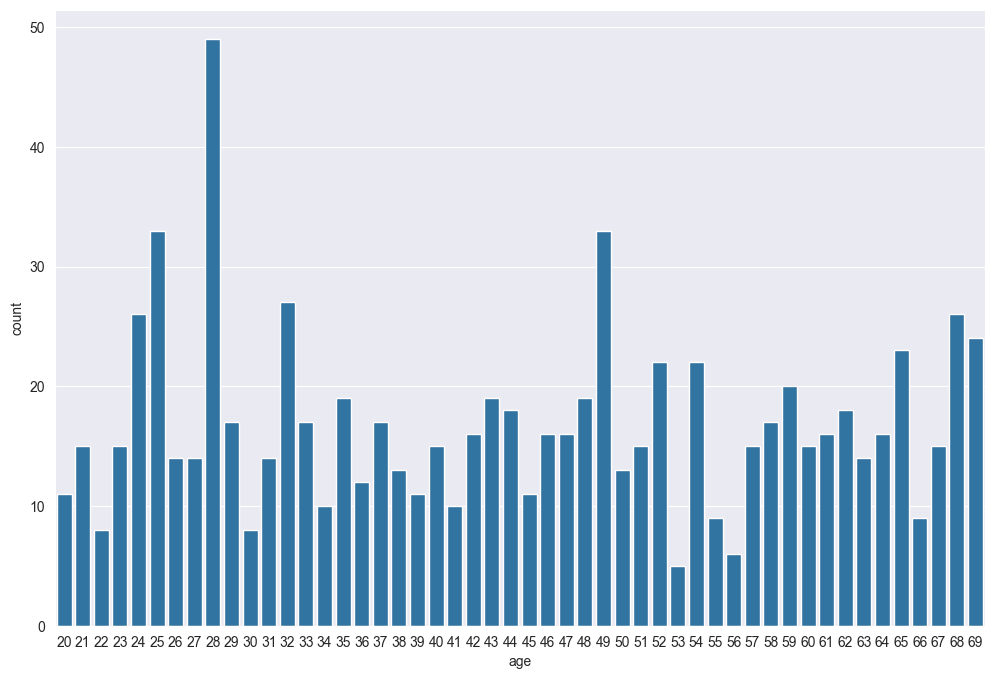

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=logs.query("platform == 'computer' & success == True").merge(user_data, how="inner", on="client"),
              x="age", stat="count")